In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
xs=[ 
226,161, 55,225,237,  7,  9,  8,185,224,225, 88, 92,110, 62,218, 61, 33,138,145,145, 29,253,195,205,150, 53,145,106,183,239,104,247, 41,206,159, 20,147, 24,108, 43, 23,220,128,248,229,210,199, 92,  3,189, 90, 90,208, 22,150,  7,122, 32,133,172,199,144,177,
]
ys=[ 
 23, 48,103,141,137, 60, 27,192,182,163,161,196,141,134,  1,  8,152, 62, 12,123, 37,212,121,228, 10,123,136,164, 69,102, 25,235,117, 72, 16,131,214,186, 18, 91,123,250, 40, 68, 53,110, 12, 31,247,178,204,253,139,127,178, 40,183,189,163,186,206, 57,248,196,
]
path=[
 0,42,61,33,17, 5, 6,38,14,53,10, 9, 8,16,54,49,56, 7,11,57,59,37,60,50,23,62,48,31,27,35,25,55,20,18,28, 2,40,52,12,13,19,47,34,24,46,15,30,44,32,22, 4, 3,45,29, 1,43,39,26,58,21,36,41,51,63,
]

In [3]:
assert(len(xs)==64)
assert(len(ys)==64)
path_set=set(path)
assert(len(path_set)==64)

In [4]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

8246.336400860524


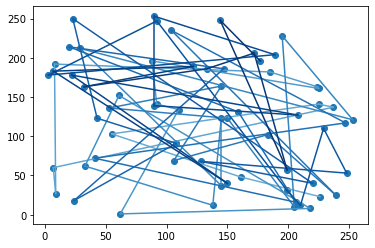

In [5]:
dist=sum([distance(xs[i],ys[i],xs[i+1],ys[i+1]) for i in range(len(path)-1)])
print(dist)
plt.clf()
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))
plt.show()

2543.867918149369


C:\Users\Sugar\AppData\Local\Temp/ipykernel_12376/3369610706.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


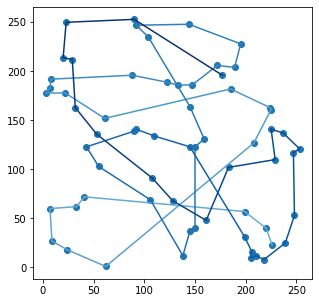

In [9]:
dist=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
print(dist)
fig=plt.figure(figsize=(5,5))
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[path[i]],xs[path[i+1]]],[ys[path[i]],ys[path[i+1]]],color=cm.Blues(i/len(path)/2+0.5))
fig.show()

In [7]:
for i in range(1,len(path)-1):
    for j in range(1,i-1):
        # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
        d1=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
        )
        # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
        d2=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
        )
        if d1>d2:
            print(f"{path[i]}{xs[path[i]],ys[path[i]]} <-> {path[j]}{xs[path[j]],ys[path[j]]}: {d1} -> {d2}")

45(229, 110) <-> 53(208, 127): 308.81290002422975 -> 307.95884790714547


In [8]:
def linerSearchSwap():
    for i in range(1,len(path)-1):
        for j in range(1,i):
            # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
            d1=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
            )
            # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
            d2=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
            )
            if d1>d2:
                path[i],path[j]=path[j],path[i]